<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Clean Dataset

In [6]:
boston_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
boston_df.shape

(506, 13)

In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


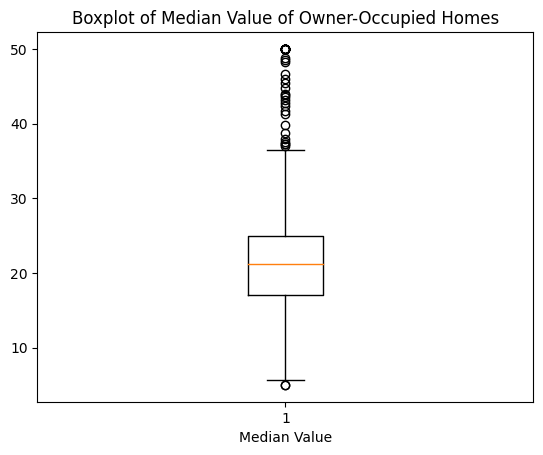

In [9]:
pyplot.boxplot(boston_df["MEDV"])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.xlabel("Median Value")
pyplot.show()

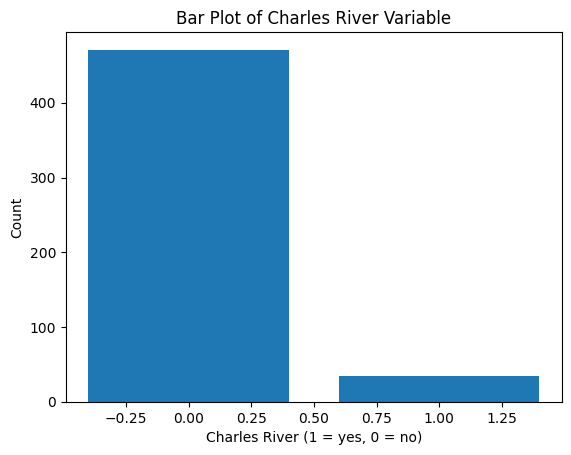

In [10]:
pyplot.bar(boston_df["CHAS"].value_counts().index, boston_df["CHAS"].value_counts())
pyplot.title("Bar Plot of Charles River Variable")
pyplot.xlabel("Charles River (1 = yes, 0 = no)")
pyplot.ylabel("Count")
pyplot.show()

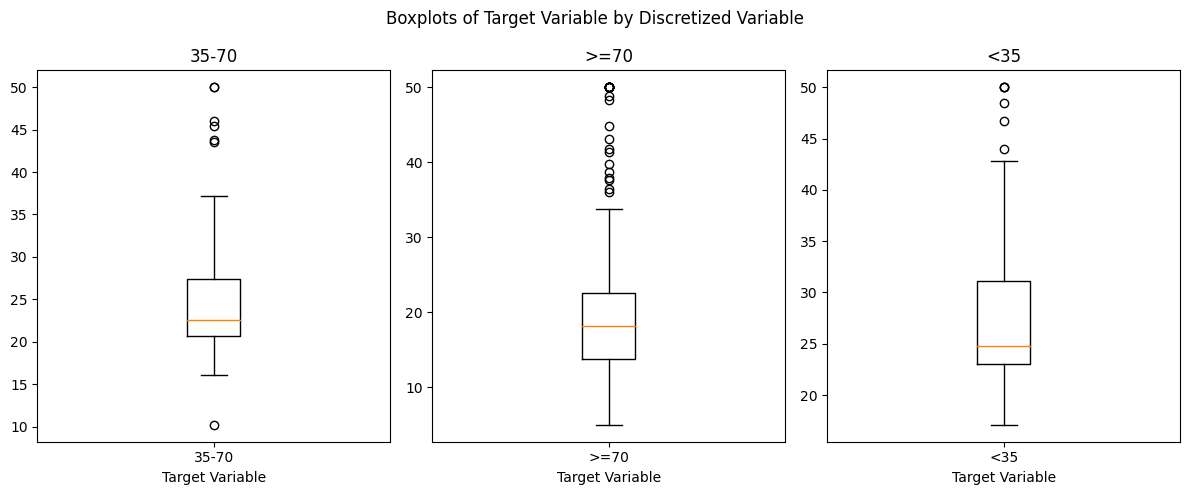

In [11]:
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, float("inf")], labels=["<35", "35-70", ">=70"])

groups = boston_df["AGE_GROUP"].unique()
# Create subplots
fig, axs = pyplot.subplots(1, len(groups), figsize=(12, 5))

# Iterate over groups and create boxplots
for i, group in enumerate(groups):
    axs[i].boxplot(boston_df[boston_df["AGE_GROUP"] == group]['MEDV'], labels=[group])
    axs[i].set_title(group)
    axs[i].set_xlabel('Target Variable')

pyplot.suptitle('Boxplots of Target Variable by Discretized Variable')
pyplot.tight_layout()
pyplot.show()

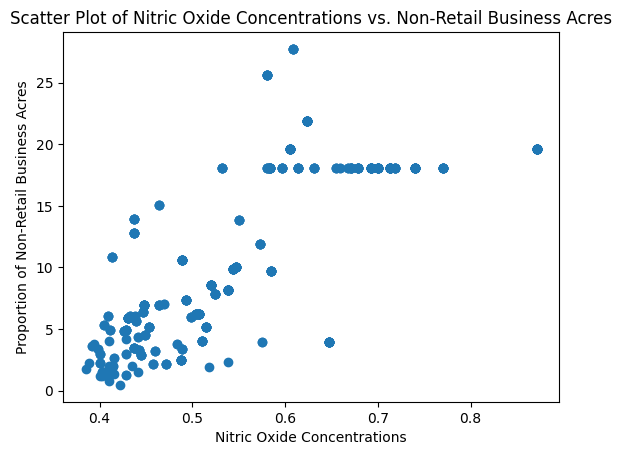

In [12]:
pyplot.scatter(boston_df["NOX"], boston_df["INDUS"])
pyplot.title("Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres")
pyplot.xlabel("Nitric Oxide Concentrations")
pyplot.ylabel("Proportion of Non-Retail Business Acres")
pyplot.show()   

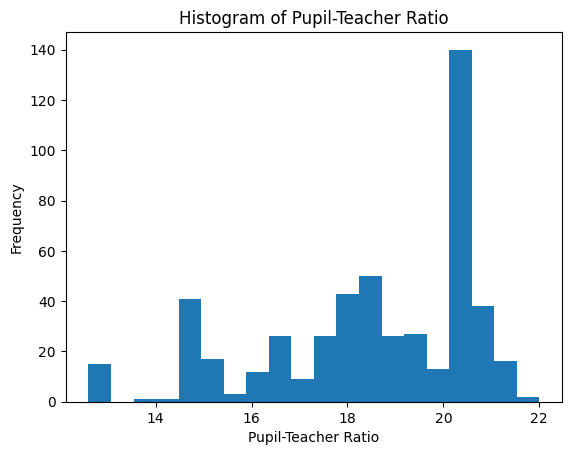

In [13]:
pyplot.hist(boston_df["PTRATIO"], bins=20)
pyplot.title("Histogram of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()   

In [14]:
# Filter data based on Charles River
data_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
data_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = scipy.stats.ttest_ind(data_bounded, data_not_bounded)

print(t_statistic)
print(p_value)

3.996437466090509
7.390623170519905e-05


p-value is under 0.05, That reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.

In [15]:


f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'][boston_df['AGE_GROUP'] == '<35'],
                                     boston_df['MEDV'][boston_df['AGE_GROUP'] == '35-70'],
                                     boston_df['MEDV'][boston_df['AGE_GROUP'] == '>=70'])

print(t_statistic)
print(p_value)
print(p_value<0.05)

3.996437466090509
1.7105011022702984e-15
True


reject the null hypothesis. There is a difference in median values of houses (MEDV) for at least one proportion of owner occupied units built prior to 1940 (AGE).

In [16]:
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(correlation_coefficient)
print(p_value)
print(p_value<0.05)

0.7636514469209192
7.913361061210442e-98
True


reject the null hypothesis. There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [17]:


X = boston_df[['LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'ZN', 'DIS', 'TAX', 'LSTAT']]
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          4.22e-130
Time:                        14:16:39   Log-Likelihood:                -1517.7
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     495   BIC:                             3104.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7685      5.045      8.279      0.0